# Supervised Learning am Fallbeispiel Ambulante oder stationäre Behandlung im Krankenhaus

# Schritt 1: Get the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
files.upload ()

Saving Krankenhaus.csv to Krankenhaus.csv


{'Krankenhaus.csv': b'HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE\r\r\n35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out\r\r\n43.5,14.8,5.39,12.7,334,27.5,34,80.7,1,F,out\r\r\n33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out\r\r\n39.1,13.7,4.98,10.5,366,27.5,35,78.5,1,F,out\r\r\n30.9,9.9,4.23,22.1,333,23.4,32,73,1,M,out\r\r\n34.3,11.6,4.53,6.6,185,25.6,33.8,75.7,1,M,out\r\r\n31.1,8.7,5.06,11.1,416,17.2,28,61.5,1,F,out\r\r\n40.3,13.3,4.73,8.1,257,28.1,33,85.2,1,F,out\r\r\n33.6,11.5,4.54,11.4,262,25.3,34.2,74,1,F,out\r\r\n35.4,11.4,4.8,2.6,183,23.8,32.2,73.8,1,F,out\r\r\n33.7,11.5,4.57,13.2,322,25.2,34.1,73.7,1,M,out\r\r\n54,16.6,7.61,10,88,21.8,30.7,71,1,F,in\r\r\n31.7,10.4,4.91,9.7,348,21.2,32.8,64.6,1,M,in\r\r\n35.3,11.9,4.4,5.8,205,27,33.7,80.2,1,M,out\r\r\n34.5,9.8,5.75,15.4,548,17,28.4,60,1,M,out\r\r\n34,10.3,5.27,16.2,572,19.5,30.3,64.5,1,M,out\r\r\n35,11.6,4.58,7.4,154,25.3,33.1,76.4,1,F,out\r\r\n51.3,15.7,7.24,4.8,129,21.7,30.6,70.9,1,F,out\r

In [4]:
Patientendaten_df = pd.read_csv('Krankenhaus.csv', sep=',')

# Schritt 2: Explore the Data

In [5]:
Patientendaten_df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in


In [7]:
Patientendaten_df.dtypes

,0
HAEMATOCRIT,float64
HAEMOGLOBINS,float64
ERYTHROCYTE,float64
LEUCOCYTE,float64
THROMBOCYTE,int64
MCH,float64
MCHC,float64
MCV,float64
AGE,int64
SEX,object


In [8]:
Patientendaten_df.head(10)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
5,34.3,11.6,4.53,6.6,185,25.6,33.8,75.7,1,M,out
6,31.1,8.7,5.06,11.1,416,17.2,28.0,61.5,1,F,out
7,40.3,13.3,4.73,8.1,257,28.1,33.0,85.2,1,F,out
8,33.6,11.5,4.54,11.4,262,25.3,34.2,74.0,1,F,out
9,35.4,11.4,4.80,2.6,183,23.8,32.2,73.8,1,F,out


In [9]:
Patientendaten_df.describe(include="all")

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412,4412
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,out
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2290,2628
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473,NaN,NaN
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218,NaN,NaN
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000,NaN,NaN
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000,NaN,NaN
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000,NaN,NaN
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000,NaN,NaN


In [10]:
Patientendaten_df.dtypes

,0
HAEMATOCRIT,float64
HAEMOGLOBINS,float64
ERYTHROCYTE,float64
LEUCOCYTE,float64
THROMBOCYTE,int64
MCH,float64
MCHC,float64
MCV,float64
AGE,int64
SEX,object


Machine Learning Verfahren können nur Zahlenwerte verwenden. Wie wir sehen, haben SEX und SOURCE keine Zahlenwerte. Also müssen wir diese umwandeln.

# Schritt 3: Daten aufbereiten/ Data Engineering

In [11]:
# umbenennen der Spalte
Patientendaten_df.rename(columns={'AGE': 'ALTER'}, inplace=True)

In [12]:
sex_mapping = {"F": 1, "M": 0} # codierung: Weiblich erhält Wert 1, Männlich 0.
Patientendaten_df['GESCHLECHT']= Patientendaten_df['SEX'].map(sex_mapping) # wende Codierung auf alle Werte an und schreibe damit neue Spalte Geschlecht
Patientendaten_df = Patientendaten_df.drop(['SEX'], axis=1) # lösche die alte Spalte

Wir schauen uns die möglichen Werte der Spalte SOURCE an

In [13]:
(Patientendaten_df['SOURCE'].unique())

array(['out', 'in'], dtype=object)

In [14]:
# wir erstellen die Zielvariable.
source_mapping = {"in": 1, "out": 0}
Patientendaten_df['TARGET']= Patientendaten_df['SOURCE'].map(source_mapping)

In [15]:
Patientendaten_df = Patientendaten_df.drop(['SOURCE'], axis=1)

In [16]:
Patientendaten_df.head(10)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,ALTER,GESCHLECHT,TARGET
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,1,0
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,1,0
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,1,0
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,1,0
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,0,0
5,34.3,11.6,4.53,6.6,185,25.6,33.8,75.7,1,0,0
6,31.1,8.7,5.06,11.1,416,17.2,28.0,61.5,1,1,0
7,40.3,13.3,4.73,8.1,257,28.1,33.0,85.2,1,1,0
8,33.6,11.5,4.54,11.4,262,25.3,34.2,74.0,1,1,0
9,35.4,11.4,4.80,2.6,183,23.8,32.2,73.8,1,1,0


wir schauen uns die möglichen Werte in der Spalte Thrombocyten an

In [18]:
Patientendaten_df['THROMBOCYTE'].unique()

array([ 310,  334,  305,  366,  333,  185,  416,  257,  262,  183,  322,
         88,  348,  205,  548,  572,  154,  129,  250,  235,  275,  394,
        260,  112,  152,  135,  111,   90,  108,   85,  115,  125,  178,
        192,  212,  136,  382,  473,  293,  294,  409,  315,  320,  279,
        470,  150,  145,  272,  193,  110,  389,  195,  182,  261,  387,
        265,  399,  255,  301,  240,  245,  189,  244,  420,  258,  298,
        222,  317,  363,  312,  213,  170,  228,  267,  236,  246,  413,
        206,  234,  191,  218,  253,  319,  225,  277,  464,  184,  179,
        143,  289,  252,  384,  390,  286,  300,  410,  359,  378,  383,
        290,  326,  181,  372,  356,  605,  443,  232,  270,  340,  342,
        207,   75,  163,  248,  377,  140,   97,   86,  249,  284,  302,
        297,  106,  306,  397,  329,  159,  426,  321,  169,  156,  268,
        186,  288,  223,  254,  100,   73,   54,   43,   41,   53,  151,
        227,  281,  563,  264,  327,  295,  103,  2

In [19]:
# wandel thrombocyten in reelle Zahlen um
Patientendaten_df['THROMBOCYTE'] = Patientendaten_df['THROMBOCYTE'].astype('float64')

In [20]:
# wandel Geschlecht in Kategorische Variable um
Patientendaten_df['GESCHLECHT'] = Patientendaten_df['GESCHLECHT'].astype('category')

In [21]:
Patientendaten_df['TARGET'] = Patientendaten_df['TARGET'].astype('category')

# Schritt 4: Daten aufteilen in Trainings- und Testmenge

In [22]:
# speichere die Spalte Target in einen Vektor y
y = Patientendaten_df['TARGET']

In [23]:
# speichere aus der bestehenden Tabelle alle Werte aller Spalten bis auf die letzte in eine Matrix X - die ist ja bereits in y
X = Patientendaten_df.iloc[:, :-1]

In [24]:
print(X.shape)

(4412, 10)


In [25]:
# wir laden eine Bibliothek, die die Daten in Test- und Trainingsmenge aufteilt
from sklearn.model_selection import train_test_split

In [26]:
# teile X und y im Verhältnis 70% Trainingsmenge und 30% Testmenge zufällig ein. Random_state hilft bei der Reproduzierbarkeit der zufälligen Aufteilung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
print(X_train.shape, X_test.shape)

(3088, 10) (1324, 10)


# Schritt 5: Machine Learning

In [28]:
# lade libraries für verschiedene Metriken
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [29]:
# Hilfsfunktion um die verschiedenen Metriken zu berchnen
def Model_accuracy(predicted_y_values, real_y_values):
  print(confusion_matrix(real_y_values, predicted_y_values))
  print(classification_report(real_y_values, predicted_y_values))
  print('Die Genauigkeit ist: ',accuracy_score(predicted_y_values, real_y_values))

## Schritt 5.1: Simple machine Learning Verfahren

### Logistische Regression

In [30]:
# lade die Bibliothek für Logistic Regression
from sklearn.linear_model import LogisticRegression
# Bereite das Training vor. Hinweis: Colab spinnt aktuell, wenn Sie Logistic Regression nicht so aufrufen
Model_Logistic_Regression = LogisticRegression(solver='lbfgs', max_iter=1000)
# Trainiere das Modell auf den Trainingsdaten
Model_Logistic_Regression.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [31]:
# Teste das Modell auf unbekannten, noch nicht gesehenen Daten
y_pred_logistic_regression = Model_Logistic_Regression.predict(X_test)

In [32]:
Model_accuracy(y_pred_logistic_regression, y_test)

[[664 102]
 [290 268]]
              precision    recall  f1-score   support

           0       0.70      0.87      0.77       766
           1       0.72      0.48      0.58       558

    accuracy                           0.70      1324
   macro avg       0.71      0.67      0.67      1324
weighted avg       0.71      0.70      0.69      1324

Die Genauigkeit ist:  0.7039274924471299


### Entscheidungsbaum

In [33]:
from sklearn.tree import DecisionTreeClassifier
Model_Decision_Tree = DecisionTreeClassifier()
Model_Decision_Tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
y_pred_decision_tree = Model_Decision_Tree.predict(X_test)

In [35]:
Model_accuracy(y_pred_decision_tree, y_test)

[[550 216]
 [217 341]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       766
           1       0.61      0.61      0.61       558

    accuracy                           0.67      1324
   macro avg       0.66      0.66      0.66      1324
weighted avg       0.67      0.67      0.67      1324

Die Genauigkeit ist:  0.6729607250755287


### Support Vector Classifier

In [36]:
from sklearn.svm import SVC
Model_SVM = SVC()
Model_SVM.fit(X_train, y_train)

SVC()

In [37]:
y_pred_SVM = Model_SVM.predict(X_test)

In [38]:
Model_accuracy(y_pred_SVM, y_test)

[[714  52]
 [351 207]]
              precision    recall  f1-score   support

           0       0.67      0.93      0.78       766
           1       0.80      0.37      0.51       558

    accuracy                           0.70      1324
   macro avg       0.73      0.65      0.64      1324
weighted avg       0.72      0.70      0.66      1324

Die Genauigkeit ist:  0.695619335347432


## Schritt 5.2: Ensemble Learning/ Kombinierte Verfahren

In [39]:
from sklearn.ensemble import RandomForestClassifier
Model_Random_Forest = RandomForestClassifier()
Model_Random_Forest.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
y_pred_random_forest = Model_Random_Forest.predict(X_test)

In [41]:
Model_accuracy(y_pred_random_forest, y_test)

[[667  99]
 [228 330]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       766
           1       0.77      0.59      0.67       558

    accuracy                           0.75      1324
   macro avg       0.76      0.73      0.74      1324
weighted avg       0.76      0.75      0.75      1324

Die Genauigkeit ist:  0.7530211480362538


Random Forest liefert nicht nur die bisher besten Ergebnisse, es hat zudem den Vorteil, daß wir uns anschauen können, welche Features/ Eigenschaften dem Modell als wichtigste für eine Vorhersage erscheinen

In [42]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

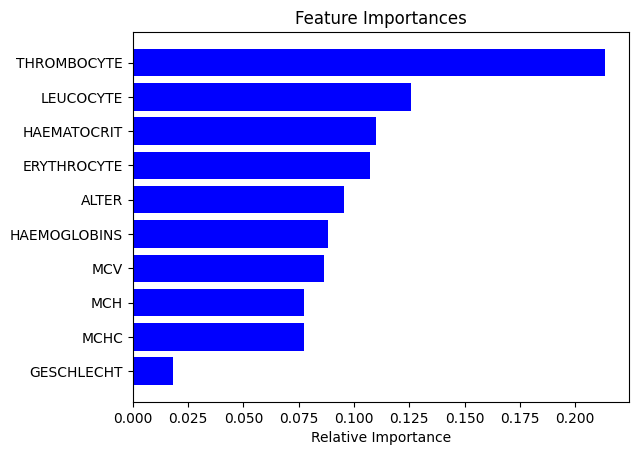

In [44]:
feature_importances = Model_Random_Forest.feature_importances_
col_names = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE',  'MCH', 'MCHC', 'MCV', 'ALTER','GESCHLECHT']
indices = np.argsort(feature_importances) # sortiere die Feature Importances absteigend

plt.title('Feature Importances') # Titel des Bildes
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center') # plotte die einzelnen Feature Importances
plt.yticks(range(len(indices)), [col_names[i] for i in indices]) # beschrifte die einzelnen Werte auf der Y-Achse
plt.xlabel('Relative Importance')
plt.show()

Wir sehen daß der Thrombozyten-Wert mit Abstand am wichtigsten ist, gefolgt von den Leukozyten.